# Cell for generating PDB files

Below is a cell that can be used to generate PDB files.

These can be uploaded to Google Drive/Google Colab to be used in place of the ligan pdb file that gets downloaded.

In [19]:
# Generate a PDB file from SMILES:
import rdkit.Chem as rdc
import rdkit.Chem.AllChem as rda

# Change this fake pdbid -- this will be used as the PDB file name
fake_pdbid = "AAAB"

# 1. Save the smiles string to a variable
smiles = 'COC1=C2C(NC(N2CC=CCN3C(NC4=C3C(OCCCN5CCOCC5)=CC(C(N)=O)=C4)=NC(C6=CC(C)=NN6CC)=O)=NC(C7=CC(C)=NN7CC)=O)=CC(C(N)=O)=C1'

# 2. Read the smiles string into an RDKit Molecule object
mol = rdc.MolFromSmiles(smiles)

# 3. Write PDB file (will appear in the directory where this notebook is being run)
writer = rdc.PDBWriter(f"{fake_pdbid}.pdb")
writer.write(mol)

# Cells for manipulating ligands in Avogadro

Below are some cells that can be used for manipulating ligands in Avogadro.

Avogadro can be installed from here (select "Download Download Installer"): https://two.avogadro.cc/install/index.html

I am envisioning a three-step process:

1. Use the cell under A below to take a SMILES and generate an XYZ string that can be plugged into Avogadro.
2. Open Avogadro and plug these coordinates into Build > Atom Coordinate Editor to build the structure. You can then manipulate the structure however you like.
3. Get the manipulated coordinates from Build > Atom Coordinate Editor and paste them in cell B below. From there, you can generate as SMILES or InChI and/or write a PDB file for the ligand.

Before you can do these things, you must run this line in the Ubuntu terminal to install xyz2mol and qcelemental:

```
mamba install -c conda-forge xyz2mol qcelemental
```

In [14]:
# Define some functions

from IPython.display import display
import pyparsing as pp
import xyz2mol
from qcelemental import periodictable as pt

symbol = pp.Word(pp.alphas)
number = pp.common.fnumber
xyz_line_parser = symbol + number + number + number

def symbols_and_coordinates_from_xyz_string(xyz_string):
    symbs = []
    xyzs = []
    for line in xyz_string.splitlines():
        if line:
            line_contents = xyz_line_parser.parseString(line).asList()
            symbs.append(line_contents[0])
            xyzs.append(line_contents[1:])
    return symbs, xyzs


def xyz_string_to_molecule_object(xyz_string):
    symbs, xyzs = symbols_and_coordinates_from_xyz_string(xyz_string)
    nums = list(map(pt.to_Z, symbs))
    mol = xyz2mol.xyz2mol(nums, xyzs)
    mol = mol[0] if mol else None
    return mol

### A. Generate XYZs for Avogadro from SMILES

The string printed at the end of this next block can be pasted in Avogadro in Build > Atomic Coordinate Editor. Make sure the format is set to "XYZ format".

In [15]:
# Generate xyz geometry for Avogadro from SMILES:
import rdkit.Chem as rdc
import rdkit.Chem.AllChem as rda

# 1. Save the smiles string to a variable
smiles = 'COC1=C2C(NC(N2CC=CCN3C(NC4=C3C(OCCCN5CCOCC5)=CC(C(N)=O)=C4)=NC(C6=CC(C)=NN6CC)=O)=NC(C7=CC(C)=NN7CC)=O)=CC(C(N)=O)=C1'

# 2. Read the smiles string into an RDKit Molecule object
mol = rdc.MolFromSmiles(smiles)

# 3. Have RDKit to determine a structure for this molecule
mol = rdc.AddHs(mol)  # add hydrogens
rda.EmbedMolecule(mol)
rda.MMFFOptimizeMolecule(mol)

# 4. Read out the coordinates for this structure
xyz_string = rdc.MolToXYZBlock(mol)
print(xyz_string)

113

C      3.423809    4.853184   -2.092880
O      3.226523    3.513258   -1.660917
C      3.717801    2.506848   -2.440521
C      3.667717    1.214031   -1.934791
C      4.179021    0.131136   -2.681902
N      4.057404   -1.025244   -1.909949
C      3.332586   -0.728017   -0.757192
N      3.170838    0.670791   -0.736258
C      2.270778    1.369791    0.156364
C      0.924004    1.514121   -0.485545
C     -0.170812    0.798443   -0.178816
C     -1.499048    0.983255   -0.861811
N     -2.406436    1.689911    0.015228
C     -2.474344    3.092694    0.123456
N     -3.266295    3.355859    1.240741
C     -3.518589    2.165544    1.923594
C     -3.022667    1.103529    1.137102
C     -3.195950   -0.213694    1.540077
O     -2.669759   -1.191672    0.748754
C     -3.021306   -2.555714    0.993358
C     -2.024453   -3.209991    1.943381
C     -2.486390   -4.549111    2.537458
N     -2.345610   -5.720763    1.664093
C     -2.407167   -6.987543    2.432032
C     -3.789585   -7.650491    2.41

### B. Generate SMILES, InChI, PDB from Avogadro XYZs

Once a structure has been manipulated, you can copy the XYZs from Build > Atomic Coordinate Editor. Again, make sure they are given in "XYZ Format".

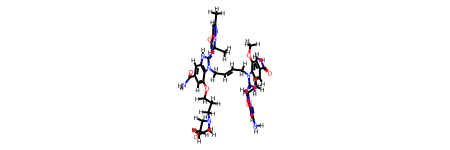

SMILES:
[H]/C(=C(/[H])C([H])([H])n1/c(=N/C(=O)c2c([H])c(C([H])([H])[H])nn2C([H])([H])C([H])([H])[H])n([H])c2c([H])c(C(=O)N([H])[H])c([H])c(OC([H])([H])C([H])([H])C([H])([H])N3C([H])([H])C([H])([H])OC([H])([H])C3([H])[H])c21)C([H])([H])n1/c(=N/C(=O)c2c([H])c(N([H])[H])nn2C([H])([H])C([H])([H])[H])n([H])c2c([H])c(C(=O)N([H])[H])c([H])c(OC([H])([H])[H])c21

InCHI:
InChI=1S/C41H50N14O7/c1-5-54-29(18-24(3)49-54)38(58)47-41-46-28-20-26(37(44)57)22-32(62-15-9-10-51-13-16-61-17-14-51)35(28)53(41)12-8-7-11-52-34-27(19-25(36(43)56)21-31(34)60-4)45-40(52)48-39(59)30-23-33(42)50-55(30)6-2/h7-8,18-23H,5-6,9-17H2,1-4H3,(H2,42,50)(H2,43,56)(H2,44,57)(H,45,48,59)(H,46,47,58)/b8-7+



In [18]:
# Generate SMILES and other formats from Avogadro xyz geometry:

# 1. Paste manipulated geometry from Avogadro here
fake_pdbid = "AAAA"
xyz_string = """
C      3.423809    4.853184   -2.092880
O      3.226523    3.513258   -1.660917
C      3.717801    2.506848   -2.440521
C      3.667717    1.214031   -1.934791
C      4.179021    0.131136   -2.681902
N      4.057404   -1.025244   -1.909949
C      3.332586   -0.728017   -0.757192
N      3.170838    0.670791   -0.736258
C      2.270778    1.369791    0.156364
C      0.924004    1.514121   -0.485545
C     -0.170812    0.798443   -0.178816
C     -1.499048    0.983255   -0.861811
N     -2.406436    1.689911    0.015228
C     -2.474344    3.092694    0.123456
N     -3.266295    3.355859    1.240741
C     -3.518589    2.165544    1.923594
C     -3.022667    1.103529    1.137102
C     -3.195950   -0.213694    1.540077
O     -2.669759   -1.191672    0.748754
C     -3.021306   -2.555714    0.993358
C     -2.024453   -3.209991    1.943381
C     -2.486390   -4.549111    2.537458
N     -2.345610   -5.720763    1.664093
C     -2.407167   -6.987543    2.432032
C     -3.789585   -7.650491    2.411479
O     -4.255218   -7.964572    1.093078
C     -3.631176   -7.177023    0.074585
C     -3.315228   -5.750782    0.549800
C     -3.878690   -0.438056    2.744061
C     -4.382100    0.640132    3.506045
C     -5.081582    0.389010    4.785654
N     -5.901977   -0.702052    4.835767
O     -4.944863    1.134321    5.742974
C     -4.208277    1.964335    3.093496
N     -1.895723    3.935706   -0.673660
C     -2.044163    5.270908   -0.399118
C     -1.812374    6.130814   -1.542043
C     -1.776015    7.519258   -1.507469
C     -1.507932    7.947172   -2.818369
C     -1.363935    9.334438   -3.321671
N     -1.384375    6.908074   -3.643082
N     -1.599444    5.822144   -2.863872
C     -1.588451    4.530533   -3.528281
C     -0.185051    3.957332   -3.621635
O     -2.315951    5.723326    0.709926
N      2.878553   -1.539861    0.142935
C      3.124051   -2.874334   -0.027100
C      3.330484   -3.577200    1.221723
C      3.616640   -4.927911    1.344276
C      3.782063   -5.176893    2.717195
N      4.124456   -6.457640    3.380109
N      3.603307   -4.066194    3.433661
N      3.321367   -3.111423    2.516891
C      3.063532   -1.775015    3.022504
C      4.307844   -0.906637    3.032473
O      3.168506   -3.434849   -1.119556
C      4.756325    0.288734   -3.921757
C      4.769504    1.579279   -4.461942
C      5.344255    1.756006   -5.822355
N      4.894407    2.811032   -6.561981
O      6.154927    0.962298   -6.283396
C      4.271933    2.678574   -3.717847
H      4.487038    5.083725   -2.198725
H      3.016759    5.515043   -1.320797
H      2.884257    5.051317   -3.023609
H      4.016597   -1.950290   -2.311713
H      2.657649    2.355846    0.433293
H      2.177127    0.825296    1.103334
H      0.853880    2.283009   -1.245663
H     -0.121214    0.028339    0.585490
H     -1.374988    1.556564   -1.789906
H     -1.903478    0.018810   -1.185690
H     -3.209516    4.255351    1.699534
H     -4.061203   -2.659449    1.329783
H     -2.971452   -3.045673    0.015728
H     -1.054554   -3.322812    1.441940
H     -1.824924   -2.524699    2.778457
H     -3.510103   -4.460901    2.925324
H     -1.844585   -4.702237    3.414466
H     -1.687750   -7.672208    1.967445
H     -2.067064   -6.855154    3.464397
H     -3.766662   -8.586733    2.977830
H     -4.531692   -6.998085    2.884536
H     -4.318660   -7.146157   -0.776986
H     -2.723785   -7.694490   -0.256157
H     -2.905564   -5.191659   -0.296231
H     -4.259378   -5.283464    0.856585
H     -4.004275   -1.440393    3.138942
H     -6.246400   -1.142957    3.996060
H     -6.476668   -0.776707    5.663483
H     -4.598409    2.795337    3.670693
H     -1.919021    8.129000   -0.627991
H     -0.457097    9.439092   -3.928079
H     -1.302068   10.046955   -2.493883
H     -2.225329    9.607748   -3.936863
H     -2.281026    3.857817   -3.019375
H     -1.994623    4.675878   -4.536823
H     -0.210470    2.950856   -4.047866
H      0.290214    3.907948   -2.639659
H      0.452316    4.581656   -4.256499
H      3.711209   -5.629994    0.527531
H      4.029080    3.279550   -6.339111
H      5.177289    2.816890   -7.532265
H      4.339201    3.668887   -4.152767
H      2.245812   -1.330714    2.449850
H      2.686111   -1.875661    4.049815
H      4.078655    0.075919    3.447203
H      4.713747   -0.762458    2.026315
H      5.098569   -1.356638    3.642186
H      5.175937   -0.551939   -4.465503
H      4.222004   -7.196761    2.669416
H      5.012740   -6.353118    3.890919
"""

# 2. Convert to an RDKit molecule object
mol_out = xyz_string_to_molecule_object(xyz_string)
display(mol_out)

# 3. Convert to SMILES
smiles_out = rdc.MolToSmiles(mol_out)
print("SMILES:")
print(smiles_out)
print()

# 4. Convert to InChI
inchi_out = rdc.MolToInchi(mol_out)
print("InCHI:")
print(inchi_out)
print()

# 5. Write PDB file (will appear in the directory where this notebook is being run)
writer = rdc.PDBWriter(f"{fake_pdbid}.pdb")
writer.write(mol_out)